# downsampling - gridSearch

- it takes longer time. 
- better accuracy(minor in this case)
- labelEncoding is reqired
- grid search
- https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

In [1]:
%%time
# data import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from IPython.display import display   

%matplotlib inline
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

adult = pd.read_csv(
    URL,
    
    # specify the file encoding
    encoding="utf-8",
    
    # specify the separator in the data
    sep=",",      # comma separated values
    
    # ignore spaces after the separator
    skipinitialspace=True,
    index_col=None,
    
    # use manual headers
    header=None,
    names=[
        "age", "workclass", "fnlwgt", "education", 
        "education-num", "marital-status", "occupation",
        "relationship", "race", "sex", "capital-gain", 
        "capital-loss", "hours-per-week", "native-country",
        "wage"
    ]
)

# categorical -> one hot encoding
# convert each categorical feature using one-hot encoding

obj_df = adult.select_dtypes(include=["object"]).drop("wage", axis=1)
int_df = adult.select_dtypes(include=["int64"])

onehot_obj = pd.get_dummies(obj_df, drop_first=True)# dummy trap(one variable can be induced)
design_adult = pd.concat([onehot_obj,int_df], axis=1)

display(design_adult)

# labelEncoder 0,1
le = preprocessing.LabelEncoder()
le.fit(["<=50K", ">50K"])


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,27,257302,12,0,0,38
32557,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,40,154374,9,0,0,40
32558,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,58,151910,9,0,0,40
32559,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,22,201490,9,0,0,20


Wall time: 6.08 s


LabelEncoder()

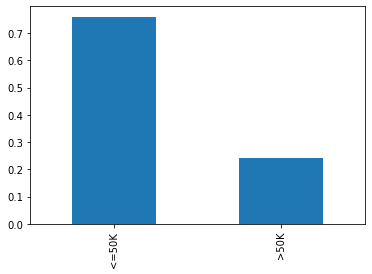

In [2]:
adult['wage'].value_counts(normalize=True).plot(kind='bar')

In [3]:
adult['wage'].value_counts()

<=50K    24720
>50K      7841
Name: wage, dtype: int64

In [4]:
design_adult['Class']=le.transform(adult['wage'])


In [5]:
design_adult.head(1)


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Class
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,39,77516,13,2174,0,40,0


In [6]:
# downsampling
from sklearn.utils import resample



df_majority = design_adult[design_adult.Class == 0]
df_minority = design_adult[design_adult.Class == 1]


In [7]:
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=7841,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Class.value_counts()

1    7841
0    7841
Name: Class, dtype: int64

In [38]:
# # Dataframe mistake... not using df_downsampled
# design_adult.iloc[:,:-1].head(1) #X variable all of the variables except Class variable
# design_adult.Class

In [40]:
df_downsampled.reset_index().iloc[:,:-1].head(1) #X variable all of the variables except Class variable
df_downsampled.reset_index().Class

0        0
1        0
2        0
3        0
4        0
        ..
15677    1
15678    1
15679    1
15680    1
15681    1
Name: Class, Length: 15682, dtype: int32

In [56]:
# 속성(변수) 선택
X=df_downsampled.reset_index().iloc[:,:-1]
y=df_downsampled.reset_index().Class

# # 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [57]:
print('Training Features Shape:', X_train.shape)
print('Training Class Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (10977, 101)
Training Class Shape: (10977,)
Testing Features Shape: (4705, 101)
Testing Labels Shape: (4705,)


In [59]:
y_train.shape

(10977,)

### Examine the Default Random Forest to Determine Parameters
- We will use these parameters as a starting point. I relied on the sklearn random forest documentation to determine which features to change and the available options.

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(random_state = 2002)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF_clf.get_params()) # print nicely


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2002,
 'verbose': 0,
 'warm_start': False}


### Random search with Cross Validation

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
#                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               
               }

pprint(random_grid)

{'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [122]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF_clf = RandomForestClassifier(random_state = 2002,oob_score=True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator=RF_clf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=2002, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [123]:
RF_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

## Evaluation Function

### EV default model

In [169]:
def evaluate(model, X_test, y_test):
    yhat = model.predict(X_test)
    oob_score = model.oob_score_
    report= mt.classification_report(y_test, yhat) 
    print('***** Model Performance. *****')
    print('- Out of Bag eror: {:0.4f}.'.format(oob_score))
    print('- y_test values:',y_test.values[0:10])
    print('- yhat   values:',y_hat[0:10],'\n')
    print('<Accuracy> \n{}'.format(report))
    
    return report

In [170]:
base_model = RandomForestClassifier(n_estimators = 50, random_state = 2002, oob_score=True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

***** Model Performance. *****
- Out of Bag eror: 0.8132.
- y_test values: [1 0 1 0 0 1 0 0 1 1]
- yhat   values: [0 0 1 0 0 0 0 1 1 1] 

<Accuracy> 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2376
           1       0.80      0.85      0.82      2329

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



### EV best random search model

In [126]:
best_random = RF_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

***** Model Performance *****
- Out of Bag eror: 0.8282.
- y_test values: [1 0 1 0 0 1 0 0 1 1]
- yhat   values: [0 0 1 0 0 0 0 1 1 1] 

<Accuracy> 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2376
           1       0.80      0.88      0.84      2329

    accuracy                           0.83      4705
   macro avg       0.83      0.83      0.83      4705
weighted avg       0.83      0.83      0.83      4705



### grid search
- We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [134]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 1000],
    'oob_score' : [True]
}

# Create a base model
RF_best = RandomForestClassifier(random_state = 2002)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF_best, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [135]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [136]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000,
 'oob_score': True}

### EV the best model from grid search


In [137]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

***** Model Performance *****
- Out of Bag eror: 0.8203.
- y_test values: [1 1 1 1 0 1 0 0 1 0]
- yhat   values: [0 0 1 0 0 0 0 1 1 1] 

<Accuracy> 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      5465
           1       0.80      0.90      0.85      5512

    accuracy                           0.84     10977
   macro avg       0.84      0.84      0.84     10977
weighted avg       0.84      0.84      0.84     10977



### Final model
- The final model from hyperparameter tuning is as follows.

In [152]:
final_model = RF_random.best_estimator_

print('***** Final Model Parameters: *****\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, X_test, y_test)

***** Final Model Parameters: *****

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 2002,
 'verbose': 0,
 'warm_start': False}


***** Model Performance *****
- Out of Bag eror: 0.8282.
- y_test values: [1 0 1 0 0 1 0 0 1 1]
- yhat   values: [0 0 1 0 0 0 0 1 1 1] 

<Accuracy> 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2376
           1       0.80      0.88      0.84      2329

    accuracy                           0.83      4705
   macro avg       0.83      0.83      0.83      4705
weighted avg       0.83      0.83      0.83      4705



## Comparison of All Improvement Techniques
- Finally, we can make comparisons between the improvement techniques to determine which ones were most effective.

In [139]:
# Time used for evaluating model run times
import time

In [143]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, X_train, y_train, X_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = X_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train, y_train)
        predictions.append(model.predict(X_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    out_of_bag_error = model.oob_score_
    yhat= model.predict(X_test)
    accuracy = mt.accuracy_score(y_test,yhat)
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': out_of_bag_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

### base model
- 10sec: 0.6 means 6secs

In [149]:
base_results = evaluate_model(base_model, X_train, y_train, X_test, y_test)
base_results['model']='base_model'
base_results

{'time': 0.6551461696624756,
 'error': 0.8131547781725426,
 'accuracy': 0.8218916046758767,
 'n_trees': 50,
 'n_features': 101,
 'model': 'base_model'}

### random search model

In [146]:
random_results = evaluate_model(best_random, X_train, y_train, X_test, y_test)
random_results['model']='best_random'
random_results

{'time': 5.497531080245972,
 'error': 0.8281862075248246,
 'accuracy': 0.830605738575983,
 'n_trees': 500,
 'n_features': 101,
 'model': 'best_random'}

### best Grid Search Best Model

In [148]:
best_grid_results = evaluate_model(best_grid, X_train, y_train, X_test, y_test)
best_grid_results['model']='best_grid'
best_grid_results

{'time': 6.0701930046081545,
 'error': 0.8202605447754395,
 'accuracy': 0.8214665249734325,
 'n_trees': 1000,
 'n_features': 101,
 'model': 'best_grid'}

## Comparison

In [160]:
comparison = {'model': [base_results['model'], random_results['model'], best_grid_results['model'] ],
              'accuracy': [round(base_results['accuracy'], 3), round(random_results['accuracy'], 3),round(best_grid_results['accuracy'], 3) ],
              'error': [round(base_results['error'], 3), round(random_results['error'], 3), round(best_grid_results['error'], 3)],
              'n_features': [base_results['n_features'], random_results['n_features'], best_grid_results['n_features']],
              'n_trees': [base_results['n_trees'], int(random_results['n_trees']), int(best_grid_results['n_trees'])],
              'time': [round(base_results['time'], 4), round(random_results['time'], 4), round(best_grid_results['time'], 4)]}


In [162]:

comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')
comparison[['model', 'accuracy', 'error', 'n_features', 'n_trees', 'time']]

,model,accuracy,error,n_features,n_trees,time
0,base_model,0.822,0.813,101,50,0.6551
1,best_random,0.831,0.828,101,500,5.4975
2,best_grid,0.821,0.820,101,1000,6.0702
